In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy==0.6.0

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

In [ ]:
import openpyxl
import konlpy
from konlpy.tag import  Okt
from konlpy.utils import pprint
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
from itertools import chain
from konlpy.tag import Twitter
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import networkx
import math
import ast
from wordcloud import WordCloud
from nltk import FreqDist
import matplotlib.pyplot as plt
from PIL import Image
from functools import reduce
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from glob import glob
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import folium
from folium import plugins
import matplotlib as mpl
import matplotlib.font_manager as fm
import json
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam
!pip install shap
import shap
from statistics import mean
from math import pi

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
company = pd.read_csv('/content/drive/MyDrive/DScover/회사소개.csv')

In [ ]:
company=company.iloc[0:3]

In [ ]:
company

,회사명,소개
0,오파스넷,"오파스넷은 IT에 전반에 대한 통찰력과 기술적 전문성을 토대로, 고객의 비즈니스 이..."
1,윈스,윈스는 세계적으로 인정받은 기술력을 가진 사이버 보안 일등기업입니다. 윈스는 199...
2,아이크래프트,"인터넷 접속을 위한 필수 통신 인프라 솔루션 , 효과적인 데이터 Traffic 전송..."


In [ ]:
company['소개'] =company ["소개"].str.replace(pat=r'[^\w.]', repl=r' ', regex=True)
company.reset_index(drop=True,inplace=True)
company

,회사명,소개
0,오파스넷,오파스넷은 IT에 전반에 대한 통찰력과 기술적 전문성을 토대로 고객의 비즈니스 이...
1,윈스,윈스는 세계적으로 인정받은 기술력을 가진 사이버 보안 일등기업입니다. 윈스는 199...
2,아이크래프트,인터넷 접속을 위한 필수 통신 인프라 솔루션 효과적인 데이터 Traffic 전송...


In [ ]:
#품사태깅
from konlpy.tag import Okt
okt = Okt()
tokenized = []

for i in range(0,3):
  text = company.iloc[i,1]
  a = okt.pos(text)
  tokenized.append(a)

company['token_okt'] = tokenized
company

,회사명,소개,token_okt
0,오파스넷,오파스넷은 IT에 전반에 대한 통찰력과 기술적 전문성을 토대로 고객의 비즈니스 이...,"[(오, Modifier), (파스, Noun), (넷, Noun), (은, Jos..."
1,윈스,윈스는 세계적으로 인정받은 기술력을 가진 사이버 보안 일등기업입니다. 윈스는 199...,"[(윈스, Noun), (는, Josa), (세계, Noun), (적, Suffix..."
2,아이크래프트,인터넷 접속을 위한 필수 통신 인프라 솔루션 효과적인 데이터 Traffic 전송...,"[(인터넷, Noun), (접속, Noun), (을, Josa), (위, Noun)..."


In [ ]:
# 명사/형용사/부사 중 불용어 설정
stopwords = ['오','파스','넷','윈스','기술','다양한','미래','높이','발전','고객','대한','창','그동안','있습니다','통해','및',
             '있어','공격']

In [ ]:
stopwords=list(set(stopwords))

In [ ]:
cleans = []
for i in range(len(company)):
    clean_words = [] 
    sentence = company.iloc[i,2]
    for word, pos in sentence:
      if word not in stopwords and pos in ('Noun', 'Adjective', 'Adverb'):# kr_wordrank에서는 'Punctuation' 구두점 추가
        clean_words.append(word)
    cleans.append(clean_words)

# 위 작업을 거친 필요한 단어들을 새로운 칼럼에 'word'만 저장한다 ('word'만 저장하는 이유는 토픽모델링에서 그렇게 써야하기 때문이다)
company['clean_words'] = cleans

company

,회사명,소개,token_okt,clean_words
0,오파스넷,오파스넷은 IT에 전반에 대한 통찰력과 기술적 전문성을 토대로 고객의 비즈니스 이...,"[(오, Modifier), (파스, Noun), (넷, Noun), (은, Jos...","[전반, 통찰, 전문성, 토대, 비즈니스, 이해, 기반, 가치, 수행, 형태, 대규..."
1,윈스,윈스는 세계적으로 인정받은 기술력을 가진 사이버 보안 일등기업입니다. 윈스는 199...,"[(윈스, Noun), (는, Josa), (세계, Noun), (적, Suffix...","[세계, 사이버, 보안, 일등, 기업, 입니다, 설립, 코스닥, 상장, 사이버, 보..."
2,아이크래프트,인터넷 접속을 위한 필수 통신 인프라 솔루션 효과적인 데이터 Traffic 전송...,"[(인터넷, Noun), (접속, Noun), (을, Josa), (위, Noun)...","[인터넷, 접속, 위, 필수, 통신, 인프라, 솔루션, 효과, 데이터, 전송, 서로..."


In [ ]:
doclist = []
for i in range(len(company)):
  nouns = ' '.join(company.iloc[i,3])
  doclist.append(nouns)

# 역시 수행 결과를 새로운 칼럼에 저장
company['clean_as_sentence'] = doclist
company

,회사명,소개,token_okt,clean_words,clean_as_sentence
0,오파스넷,오파스넷은 IT에 전반에 대한 통찰력과 기술적 전문성을 토대로 고객의 비즈니스 이...,"[(오, Modifier), (파스, Noun), (넷, Noun), (은, Jos...","[전반, 통찰, 전문성, 토대, 비즈니스, 이해, 기반, 가치, 수행, 형태, 대규...",전반 통찰 전문성 토대 비즈니스 이해 기반 가치 수행 형태 대규모 프로젝트 프로젝트...
1,윈스,윈스는 세계적으로 인정받은 기술력을 가진 사이버 보안 일등기업입니다. 윈스는 199...,"[(윈스, Noun), (는, Josa), (세계, Noun), (적, Suffix...","[세계, 사이버, 보안, 일등, 기업, 입니다, 설립, 코스닥, 상장, 사이버, 보...",세계 사이버 보안 일등 기업 입니다 설립 코스닥 상장 사이버 보안 기업 입니다 네트...
2,아이크래프트,인터넷 접속을 위한 필수 통신 인프라 솔루션 효과적인 데이터 Traffic 전송...,"[(인터넷, Noun), (접속, Noun), (을, Josa), (위, Noun)...","[인터넷, 접속, 위, 필수, 통신, 인프라, 솔루션, 효과, 데이터, 전송, 서로...",인터넷 접속 위 필수 통신 인프라 솔루션 효과 데이터 전송 서로 다른 프로토콜 관리...


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features = 1000)
x = tfidf_vectorizer.fit(company.clean_as_sentence)
tfidf_df = pd.DataFrame(x.transform(company.clean_as_sentence).toarray(), columns = sorted(tfidf_vectorizer.vocabulary_))

important_words = []
for i in range(0, len(tfidf_df)):
  a = []
  imp_word = tfidf_df.iloc[i, :].index[tfidf_df.iloc[i, :].values > 0.1].tolist()
  a.append(imp_word)
  important_words.append(a)

company['important_words'] = important_words
company

,회사명,소개,token_okt,clean_words,clean_as_sentence,important_words
0,오파스넷,오파스넷은 IT에 전반에 대한 통찰력과 기술적 전문성을 토대로 고객의 비즈니스 이...,"[(오, Modifier), (파스, Noun), (넷, Noun), (은, Jos...","[전반, 통찰, 전문성, 토대, 비즈니스, 이해, 기반, 가치, 수행, 형태, 대규...",전반 통찰 전문성 토대 비즈니스 이해 기반 가치 수행 형태 대규모 프로젝트 프로젝트...,"[[개선, 결합, 도입, 보수, 비즈니스, 서비스, 솔루션, 수행, 시스템, 실시간..."
1,윈스,윈스는 세계적으로 인정받은 기술력을 가진 사이버 보안 일등기업입니다. 윈스는 199...,"[(윈스, Noun), (는, Josa), (세계, Noun), (적, Suffix...","[세계, 사이버, 보안, 일등, 기업, 입니다, 설립, 코스닥, 상장, 사이버, 보...",세계 사이버 보안 일등 기업 입니다 설립 코스닥 상장 사이버 보안 기업 입니다 네트...,"[[개발, 공급, 국내, 글로벌, 보안, 사업, 사이버, 서비스, 시스템, 시장, ..."
2,아이크래프트,인터넷 접속을 위한 필수 통신 인프라 솔루션 효과적인 데이터 Traffic 전송...,"[(인터넷, Noun), (접속, Noun), (을, Josa), (위, Noun)...","[인터넷, 접속, 위, 필수, 통신, 인프라, 솔루션, 효과, 데이터, 전송, 서로...",인터넷 접속 위 필수 통신 인프라 솔루션 효과 데이터 전송 서로 다른 프로토콜 관리...,"[[구축, 금융, 기능, 기업체, 다른, 데이터, 보안, 분산, 사이트, 새로운, ..."


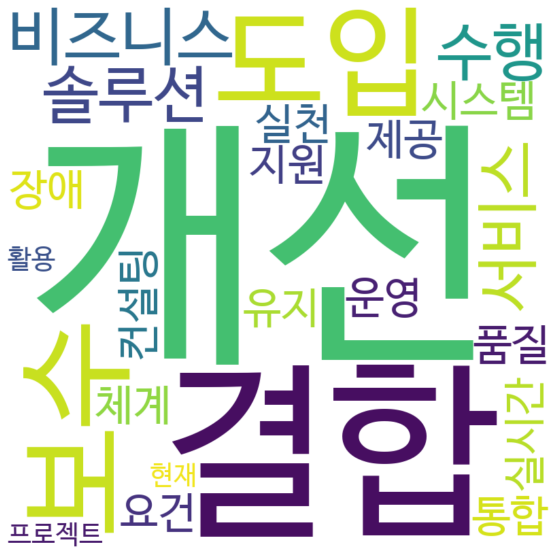

In [ ]:
#오파스넷 워드클라우드
company_오파스넷 = company[company['회사명']=='오파스넷']
company_오파스넷 = company_오파스넷['important_words'].to_list()
tw = Twitter()

text = ''.join(str(v) for v in company_오파스넷)
text_nouns = FreqDist(tw.nouns(text))

wordcloud = WordCloud(
    font_path ='/content/drive/MyDrive/DScover/NanumBarunGothic.ttf',
    width = 800,
    height = 800,
    background_color="white"
)

wordcloud = wordcloud.generate_from_frequencies(text_nouns)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

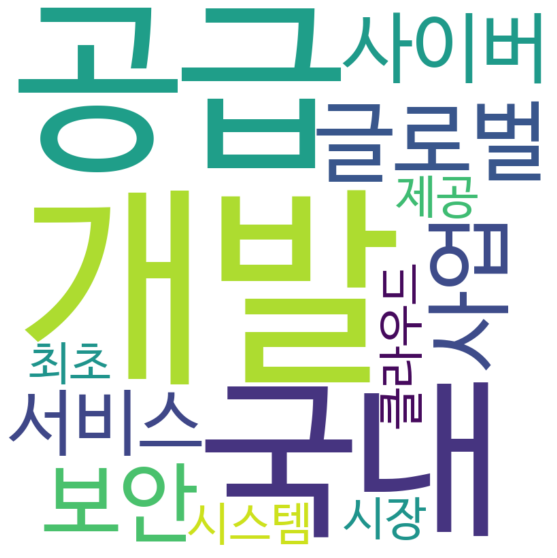

In [ ]:
#윈스 워드클라우드
company_윈스 = company[company['회사명']=='윈스']
company_윈스 = company_윈스['important_words'].to_list()
tw = Twitter()

text = ''.join(str(v) for v in company_윈스)
text_nouns = FreqDist(tw.nouns(text))

wordcloud = WordCloud(
    font_path ='/content/drive/MyDrive/DScover/NanumBarunGothic.ttf',
    width = 800,
    height = 800,
    background_color="white"
)

wordcloud = wordcloud.generate_from_frequencies(text_nouns)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

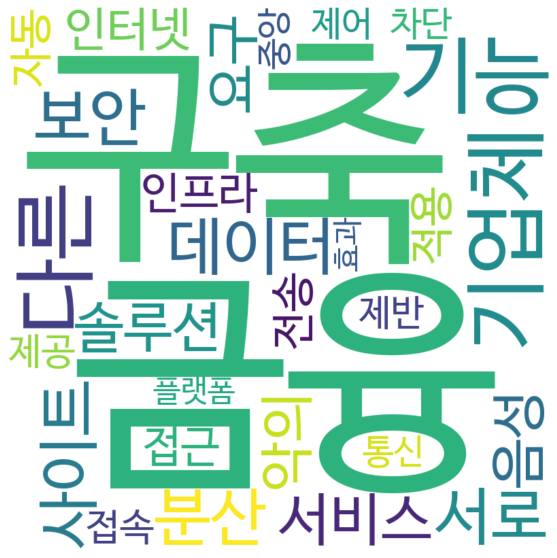

In [ ]:
#아이크래프트 워드클라우드
company_아이크래프트 = company[company['회사명']=='아이크래프트']
company_아이크래프트 = company_아이크래프트['important_words'].to_list()
tw = Twitter()

text = ''.join(str(v) for v in company_아이크래프트)
text_nouns = FreqDist(tw.nouns(text))

wordcloud = WordCloud(
    font_path ='/content/drive/MyDrive/DScover/NanumBarunGothic.ttf',
    width = 800,
    height = 800,
    background_color="white"
)

wordcloud = wordcloud.generate_from_frequencies(text_nouns)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 기업별 토픽 

In [ ]:
company_news = pd.read_csv('/content/drive/MyDrive/DScover/회사 뉴스 크롤링.csv')

#필요없는 컬럼 삭제
company_news.drop('Unnamed: 0',axis=1,inplace=True)
company_news.drop('url',axis=1,inplace=True)
company_news

,회사명,title,content
0,오파스넷,오파스넷 주가 '날갯짓'...매출액ㆍ영업이익 등 실적개선 부각,"[<p>[핀포인트뉴스 이경선 기자] 오파스넷 주가가 훨훨 날고 있다.</p>, <p..."
1,오파스넷,지엔원에너지·PN풍년·대한약품 주가 '활짝'... 오파스넷·한국수출포장 기술력 '고평가',[<p>[핀포인트뉴스 주지영 기자] 지난 1일 장마감을 기준으로 52주 최고가에 가...
2,오파스넷,"오파스넷, 3분기 영업익 14억…전년比 2.7%↑","[<p class=""date"">2022.12.08 (목)</p>, <p class=..."
3,오파스넷,"NI(네트워크통합) 관련주, 1.78% ↑... 오파스넷·링네트, 기술력 '고평가'",[<p>[핀포인트뉴스 홍미경 기자] NI(네트워크통합) 관련주들이 전거래일 대비 1...
4,오파스넷,[춤추는 테마주②]선거철도 아닌데 정치테마주,"[<p class=""date"">2022.12.08 (목)</p>, <p class=..."
...,...,...,...
115,아이크래프트,"아이크래프트, 1분기 잠정 영업익 -21억…전년比 9.6%↓",[]
116,아이크래프트,30일 장마감 후 주요 종목뉴스,"[<p><span>“손흥민, 도핑 걸릴까 진통 견뎠다” 주치의가 전한 부상 비하인드..."
117,아이크래프트,[백신여권 관련주] SGA솔루션즈·KT '눈물' 아이크래프트 '웃음',[]
118,아이크래프트,"아이크래프트, NI 전용 테스트랩 갖춘 '성수 T.E.C.H 센터' 오픈",[<p>[데이터넷] 아이크래프트가 성수동 성수에이원센터 7층에 성수 T.E.C.H(...


**회사별로 관련도순 40개씩 기사 크롤링 ( 날짜기준으로 어떻게 하는지 모르겠음^ㅎ^)
**

In [ ]:
company_news.isna().sum()

회사명        0
title      0
content    0
dtype: int64

In [ ]:
company_news['title'] = company_news["title"].str.replace(pat=r'[^\w.]', repl=r' ', regex=True)
company_news['content'] = company_news["content"].str.replace(pat=r'[^\w.]', repl=r' ', regex=True)
company_news=company_news.reset_index(drop=True)
# 언론사에서 중복된 내용의 뉴스를 제공하는 경우가 있는데, 이때 해당 뉴스의 중요도가 과대평가될 가능성이 있으므로 언론사와 제목을 기준으로 중복된 뉴스를 제거한다.
company_news=company_news.drop_duplicates(['title'])
company_news=company_news.reset_index(drop=True)
company_news

,회사명,title,content
0,오파스넷,오파스넷 주가 날갯짓 ...매출액ㆍ영업이익 등 실적개선 부각,p 핀포인트뉴스 이경선 기자 오파스넷 주가가 훨훨 날고 있다. p p...
1,오파스넷,지엔원에너지 PN풍년 대한약품 주가 활짝 ... 오파스넷 한국수출포장 기술력 고평가,p 핀포인트뉴스 주지영 기자 지난 1일 장마감을 기준으로 52주 최고가에 가...
2,오파스넷,오파스넷 3분기 영업익 14억 전년比 2.7,p class date 2022.12.08 목 p p class ...
3,오파스넷,NI 네트워크통합 관련주 1.78 ... 오파스넷 링네트 기술력 고평가,p 핀포인트뉴스 홍미경 기자 NI 네트워크통합 관련주들이 전거래일 대비 1...
4,오파스넷,춤추는 테마주② 선거철도 아닌데 정치테마주,p class date 2022.12.08 목 p p class ...
...,...,...,...
114,아이크래프트,아이크래프트 오전 갑작스런 상한가 폭발적 매수세 쏟아져,p 이코노뉴스 어 만 기자 아이크래프트가 상한가다. p p 아이크래프...
115,아이크래프트,아이크래프트 1분기 잠정 영업익 21억 전년比 9.6,
116,아이크래프트,30일 장마감 후 주요 종목뉴스,p span 손흥민 도핑 걸릴까 진통 견뎠다 주치의가 전한 부상 비하인드...
117,아이크래프트,백신여권 관련주 SGA솔루션즈 KT 눈물 아이크래프트 웃음,


In [ ]:
company_news.iloc[0,1]

'오파스넷 주가  날갯짓 ...매출액ㆍ영업이익 등 실적개선 부각'

# 제목 & 본문 품사 태깅


In [ ]:
from konlpy.tag import Okt
okt = Okt()
title_tokenized = []
content_tokenized=[]

for i in range(0,len(company_news['title'])):
  text = company_news.iloc[i,1]
  a = okt.pos(text)
  title_tokenized.append(a)

for i in range(0,len(company_news['content'])):
  text = company_news.iloc[i,2]
  a = okt.pos(text)
  content_tokenized.append(a)

company_news['title_token_okt'] = title_tokenized
company_news['content_token_okt'] = content_tokenized
company_news

,회사명,title,content,title_token_okt,content_token_okt
0,오파스넷,오파스넷 주가 날갯짓 ...매출액ㆍ영업이익 등 실적개선 부각,p 핀포인트뉴스 이경선 기자 오파스넷 주가가 훨훨 날고 있다. p p...,"[(오, Modifier), (파스, Noun), (넷, Noun), (주가, No...","[(p, Alpha), (핀, Noun), (포인트, Noun), (뉴스, Noun..."
1,오파스넷,지엔원에너지 PN풍년 대한약품 주가 활짝 ... 오파스넷 한국수출포장 기술력 고평가,p 핀포인트뉴스 주지영 기자 지난 1일 장마감을 기준으로 52주 최고가에 가...,"[(지엔, Noun), (원, Modifier), (에너지, Noun), (PN, ...","[(p, Alpha), (핀, Noun), (포인트, Noun), (뉴스, Noun..."
2,오파스넷,오파스넷 3분기 영업익 14억 전년比 2.7,p class date 2022.12.08 목 p p class ...,"[(오, Modifier), (파스, Noun), (넷, Noun), (3분, Nu...","[(p, Alpha), (class, Alpha), (date, Alpha), (2..."
3,오파스넷,NI 네트워크통합 관련주 1.78 ... 오파스넷 링네트 기술력 고평가,p 핀포인트뉴스 홍미경 기자 NI 네트워크통합 관련주들이 전거래일 대비 1...,"[(NI, Alpha), (네트워크, Noun), (통합, Noun), (관련, N...","[(p, Alpha), (핀, Noun), (포인트, Noun), (뉴스, Noun..."
4,오파스넷,춤추는 테마주② 선거철도 아닌데 정치테마주,p class date 2022.12.08 목 p p class ...,"[(춤추는, Verb), (테마주, Noun), (②, Foreign), (선거, ...","[(p, Alpha), (class, Alpha), (date, Alpha), (2..."
...,...,...,...,...,...
114,아이크래프트,아이크래프트 오전 갑작스런 상한가 폭발적 매수세 쏟아져,p 이코노뉴스 어 만 기자 아이크래프트가 상한가다. p p 아이크래프...,"[(아이, Noun), (크래프트, Noun), (오전, Noun), (갑작스런, ...","[(p, Alpha), (이, Determiner), (코노, Noun), (뉴스,..."
115,아이크래프트,아이크래프트 1분기 잠정 영업익 21억 전년比 9.6,,"[(아이, Noun), (크래프트, Noun), (1분, Number), (기, F...",[]
116,아이크래프트,30일 장마감 후 주요 종목뉴스,p span 손흥민 도핑 걸릴까 진통 견뎠다 주치의가 전한 부상 비하인드...,"[(30일, Number), (장마, Noun), (감, Noun), (후, Nou...","[(p, Alpha), (span, Alpha), (손흥민, Noun), (도핑, ..."
117,아이크래프트,백신여권 관련주 SGA솔루션즈 KT 눈물 아이크래프트 웃음,,"[(백신, Noun), (여권, Noun), (관련, Noun), (주, Noun)...",[]


# 명사 중에 불용어 설정 
 -> 명사만 뽑아낼거기때문에 다른 품사 신경 안 써도 됨\
 -> 불용어 임의 설정인데 ... 

In [ ]:
stopwords = ['오','파스','넷','윈스','아이','크래프트','기술','미래','발전','고객','대한','창','있습니다','통해','및',
             '있어','공격','핀','포인트','뉴스','코노','기자','있으며','등','있다','뉴스','기사','제목','내용','년','홍','미경','서울','오늘','점심식사',
             '오전','오후','믹스','거세','나이','한동훈']

stopwords=list(set(stopwords))

# 제목이랑 본문에서 불용어 아닌 명사만 뽑아서 clean_words 컬럼에 합치기

In [ ]:
cleans = []
for i in range(len(company_news)):
    clean_words = [] 
    title_okt = company_news.iloc[i,3]
    content_okt=company_news.iloc[i,4]
    for word, pos in title_okt:
      if word not in stopwords and pos in ('Noun'):# kr_wordrank에서는 'Punctuation' 구두점 추가
        clean_words.append(word)
    for word, pos in content_okt:
      if word not in stopwords and pos in ('Noun'):
        clean_words.append(word)

    cleans.append(clean_words)

# 위 작업을 거친 필요한 단어들을 새로운 칼럼에 'word'만 저장한다 ('word'만 저장하는 이유는 토픽모델링에서 그렇게 써야하기 때문이다)
company_news['clean_words'] = cleans

company_news

,회사명,title,content,title_token_okt,content_token_okt,clean_words
0,오파스넷,오파스넷 주가 날갯짓 ...매출액ㆍ영업이익 등 실적개선 부각,p 핀포인트뉴스 이경선 기자 오파스넷 주가가 훨훨 날고 있다. p p...,"[(오, Modifier), (파스, Noun), (넷, Noun), (주가, No...","[(p, Alpha), (핀, Noun), (포인트, Noun), (뉴스, Noun...","[주가, 날갯짓, 매출, 액, 영업, 이익, 실적, 개선, 부각, 이경선, 주가, ..."
1,오파스넷,지엔원에너지 PN풍년 대한약품 주가 활짝 ... 오파스넷 한국수출포장 기술력 고평가,p 핀포인트뉴스 주지영 기자 지난 1일 장마감을 기준으로 52주 최고가에 가...,"[(지엔, Noun), (원, Modifier), (에너지, Noun), (PN, ...","[(p, Alpha), (핀, Noun), (포인트, Noun), (뉴스, Noun...","[지엔, 에너지, 풍년, 약품, 주가, 활짝, 한국, 수출, 포장, 평가, 주지영,..."
2,오파스넷,오파스넷 3분기 영업익 14억 전년比 2.7,p class date 2022.12.08 목 p p class ...,"[(오, Modifier), (파스, Noun), (넷, Noun), (3분, Nu...","[(p, Alpha), (class, Alpha), (date, Alpha), (2...","[영업, 익, 목, 금융, 영업, 익, 등록, 요약, 네트워크, 사업, 실적, 동반..."
3,오파스넷,NI 네트워크통합 관련주 1.78 ... 오파스넷 링네트 기술력 고평가,p 핀포인트뉴스 홍미경 기자 NI 네트워크통합 관련주들이 전거래일 대비 1...,"[(NI, Alpha), (네트워크, Noun), (통합, Noun), (관련, N...","[(p, Alpha), (핀, Noun), (포인트, Noun), (뉴스, Noun...","[네트워크, 통합, 관련, 주, 링, 네트, 평가, 네트워크, 통합, 관련, 주, ..."
4,오파스넷,춤추는 테마주② 선거철도 아닌데 정치테마주,p class date 2022.12.08 목 p p class ...,"[(춤추는, Verb), (테마주, Noun), (②, Foreign), (선거, ...","[(p, Alpha), (class, Alpha), (date, Alpha), (2...","[테마주, 선거, 철도, 정치, 테마주, 목, 경제, 테마주, 선거, 철도, 정치,..."
...,...,...,...,...,...,...
114,아이크래프트,아이크래프트 오전 갑작스런 상한가 폭발적 매수세 쏟아져,p 이코노뉴스 어 만 기자 아이크래프트가 상한가다. p p 아이크래프...,"[(아이, Noun), (크래프트, Noun), (오전, Noun), (갑작스런, ...","[(p, Alpha), (이, Determiner), (코노, Noun), (뉴스,...","[상한, 폭발, 만, 상한, 코스닥, 시장, 현재, 전, 거래, 일보, 상승, 거래..."
115,아이크래프트,아이크래프트 1분기 잠정 영업익 21억 전년比 9.6,,"[(아이, Noun), (크래프트, Noun), (1분, Number), (기, F...",[],"[잠정, 영업, 익]"
116,아이크래프트,30일 장마감 후 주요 종목뉴스,p span 손흥민 도핑 걸릴까 진통 견뎠다 주치의가 전한 부상 비하인드...,"[(30일, Number), (장마, Noun), (감, Noun), (후, Nou...","[(p, Alpha), (span, Alpha), (손흥민, Noun), (도핑, ...","[장마, 감, 후, 주요, 종목, 손흥민, 도핑, 진통, 주치의, 전, 부상, 비하..."
117,아이크래프트,백신여권 관련주 SGA솔루션즈 KT 눈물 아이크래프트 웃음,,"[(백신, Noun), (여권, Noun), (관련, Noun), (주, Noun)...",[],"[백신, 여권, 관련, 주, 솔루션, 눈물, 웃음]"


# 오파스넷 토픽 추출

In [ ]:
오파스넷 = company_news[company_news['회사명']=='오파스넷']
오파스넷=오파스넷.reset_index(drop=True)

doclist = list()
for i in range(len(오파스넷)) :
  nouns = ' '.join(오파스넷['clean_words'][i])
  doclist.append(nouns)

오파스넷["clean_as_sentence"] = doclist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.95, max_features=1000, min_df=1, ngram_range=(1,2))

feat_vect = count_vectorizer.fit_transform(오파스넷.clean_as_sentence)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (40, 1000)


In [ ]:
# 모델 파라미터 CV
search_params = {'n_components': [2,3,5, 7, 9, 11,13], 
                 'learning_decay': [.7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
# 10분 이상 소요될 수 있음
model.fit(feat_vect)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.7, 0.9],
                         'n_components': [2, 3, 5, 7, 9, 11, 13]})

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(feat_vect))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 2}
Best Log Likelihood Score:  -12153.063355425043
Model Perplexity:  652.6634671987587


In [ ]:
# Plotting tools
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, feat_vect, count_vectorizer)
pyLDAvis.display(vis)

# 윈스 토픽 추출

In [ ]:
윈스 = company_news[company_news['회사명']=='윈스']
윈스=윈스.reset_index(drop=True)

doclist = list()
for i in range(len(윈스)) :
  nouns = ' '.join(윈스['clean_words'][i])
  doclist.append(nouns)

윈스["clean_as_sentence"] = doclist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.95, max_features=1000, min_df=1, ngram_range=(1,2))

feat_vect = count_vectorizer.fit_transform(윈스.clean_as_sentence)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (40, 1000)


In [ ]:
# 모델 파라미터 CV
search_params = {'n_components': [2,3,5, 7, 9, 11,13], 
                 'learning_decay': [.7, .9]}

# Init the Model
lda = LatentDirichletAllocation(random_state=122)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search

model.fit(feat_vect)
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(feat_vect))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 2}
Best Log Likelihood Score:  -24338.462445838697
Model Perplexity:  604.8732196782139


In [ ]:
# Plotting tools
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, feat_vect, count_vectorizer)
pyLDAvis.display(vis)

# 아이크래프트 토픽 추출

In [ ]:
아이크래프트 = company_news[company_news['회사명']=='아이크래프트']
아이크래프트=아이크래프트.reset_index(drop=True)

doclist = list()
for i in range(len(아이크래프트)) :
  nouns = ' '.join(아이크래프트['clean_words'][i])
  doclist.append(nouns)

아이크래프트["clean_as_sentence"] = doclist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.95, max_features=1000, min_df=1, ngram_range=(1,2))

feat_vect = count_vectorizer.fit_transform(아이크래프트.clean_as_sentence)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (39, 1000)


In [ ]:
# 모델 파라미터 CV
search_params = {'n_components': [2,3,5, 7, 9, 11,13], 
                 'learning_decay': [.7, .9]}

# Init the Model
lda = LatentDirichletAllocation(random_state=122)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search

model.fit(feat_vect)
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(feat_vect))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 2}
Best Log Likelihood Score:  -7997.32027800856
Model Perplexity:  745.0820241256272


In [ ]:
# Plotting tools
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, feat_vect, count_vectorizer)
pyLDAvis.display(vis)